In [1]:
import pandas as pd

# Load the data
daily_data_path = '../data/random_daily_mock_sumnet_data.csv'
daily_data = pd.read_csv(daily_data_path, parse_dates=['Date'])
daily_data.set_index('Date', inplace=True)


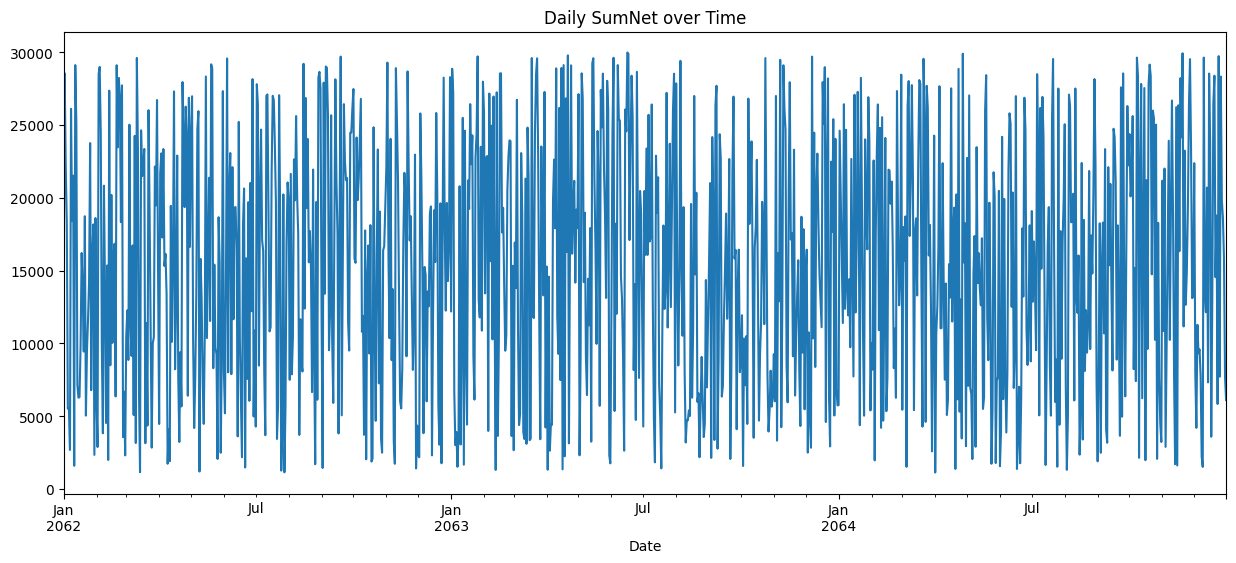

In [2]:
import matplotlib.pyplot as plt

daily_data['SumNet'].plot(figsize=(15, 6))
plt.title('Daily SumNet over Time')
plt.show()


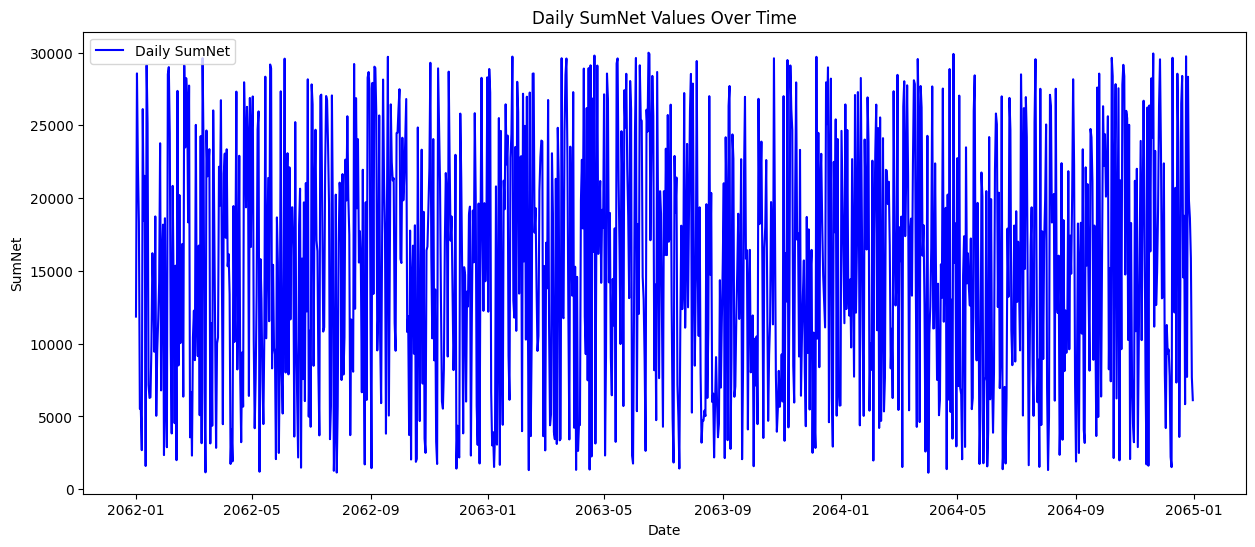

In [3]:
import matplotlib.pyplot as plt

# Plotting the 'SumNet' values over time for a visual assessment.
plt.figure(figsize=(15, 6))
plt.plot(daily_data['SumNet'], label='Daily SumNet', color='blue')
plt.title('Daily SumNet Values Over Time')
plt.xlabel('Date')
plt.ylabel('SumNet')
plt.legend()
plt.show()


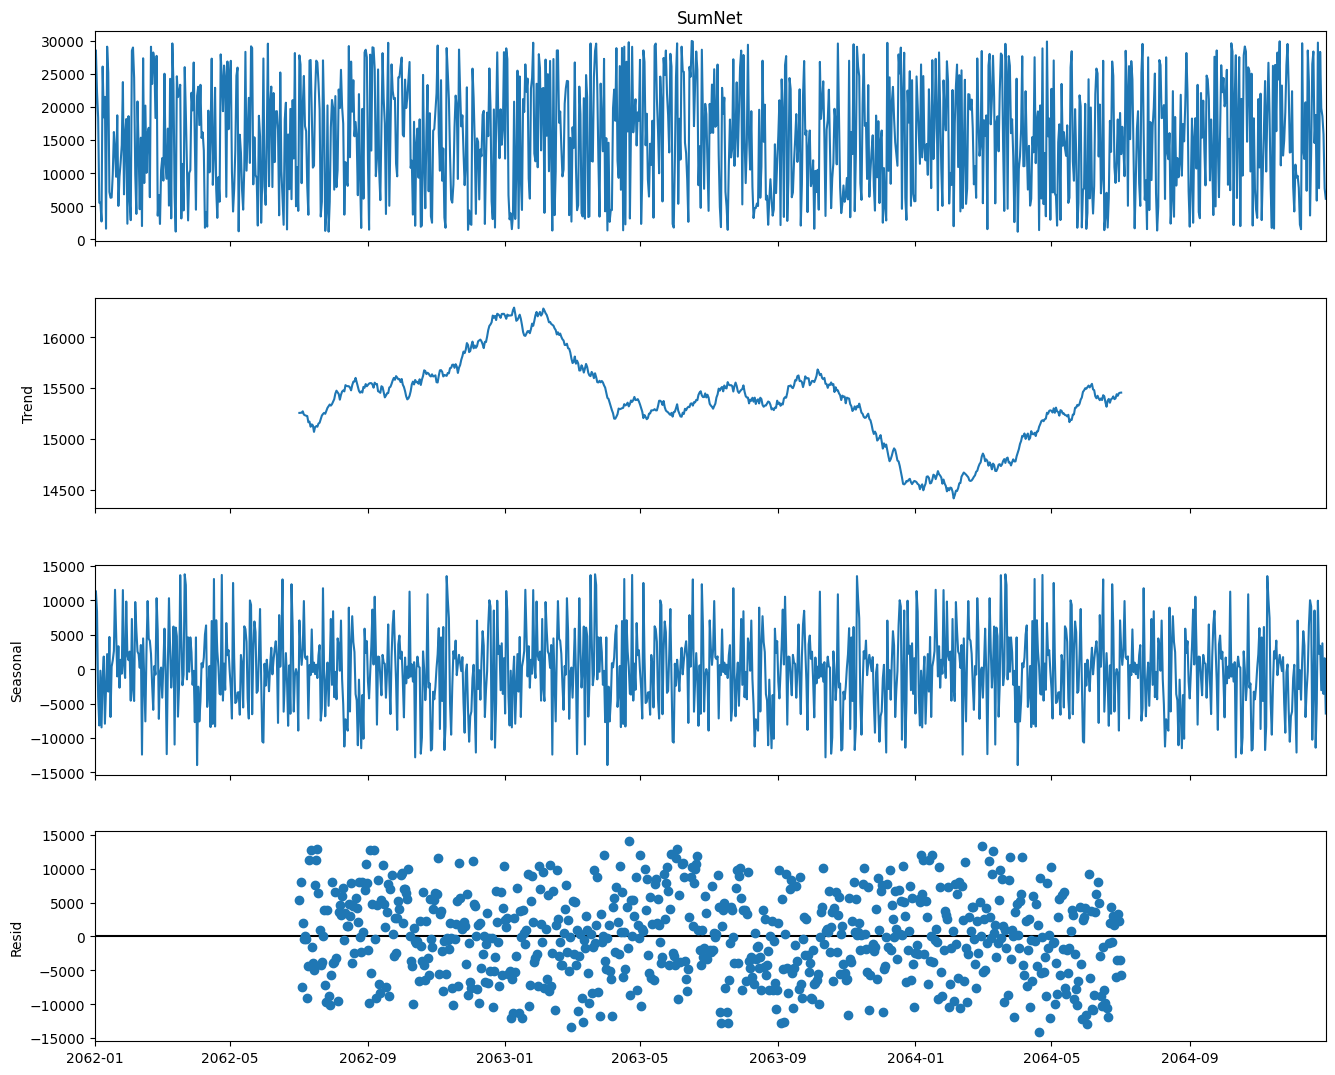

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition to analyze trends, seasonality, and residuals.
decomposition = seasonal_decompose(daily_data['SumNet'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(15, 12)
plt.show()


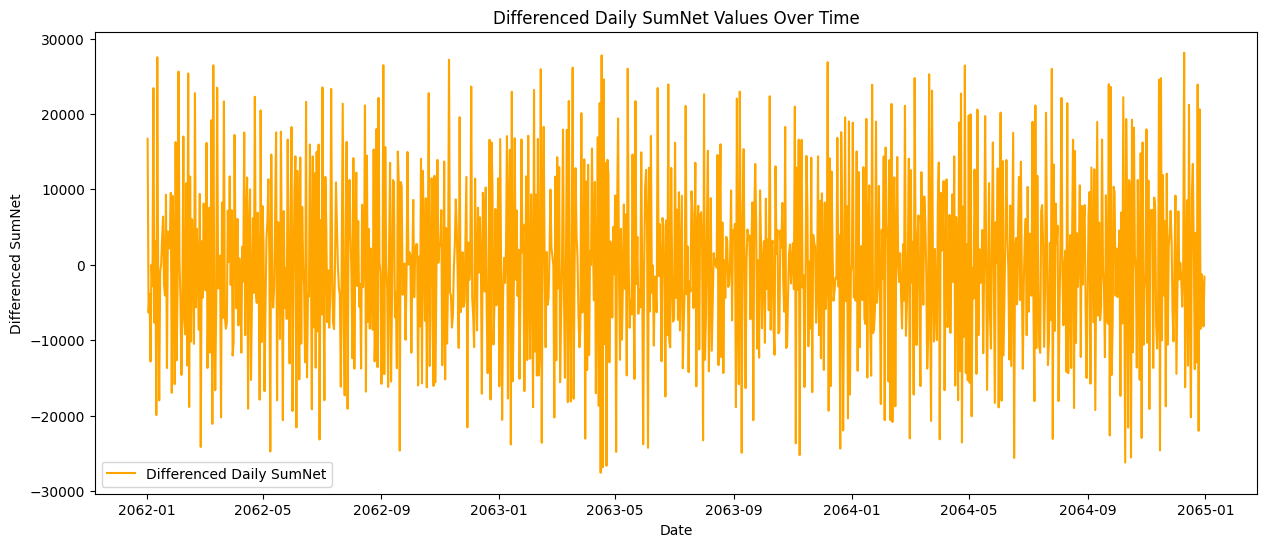

In [5]:
# Applying first-order differencing to the 'SumNet' series to remove any trend.
daily_data['SumNet_Diff'] = daily_data['SumNet'].diff().dropna()

# Plotting the differenced data.
plt.figure(figsize=(15, 6))
plt.plot(daily_data['SumNet_Diff'], label='Differenced Daily SumNet', color='orange')
plt.title('Differenced Daily SumNet Values Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced SumNet')
plt.legend()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity.
result = adfuller(daily_data['SumNet_Diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Interpret the results based on the p-value.


ADF Statistic: -12.728555
p-value: 0.000000


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you've determined the optimal order and seasonal_order
model = SARIMAX(daily_data['SumNet'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Forecasting the next year (365 days)
forecast = model_fit.forecast(steps=365)


C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


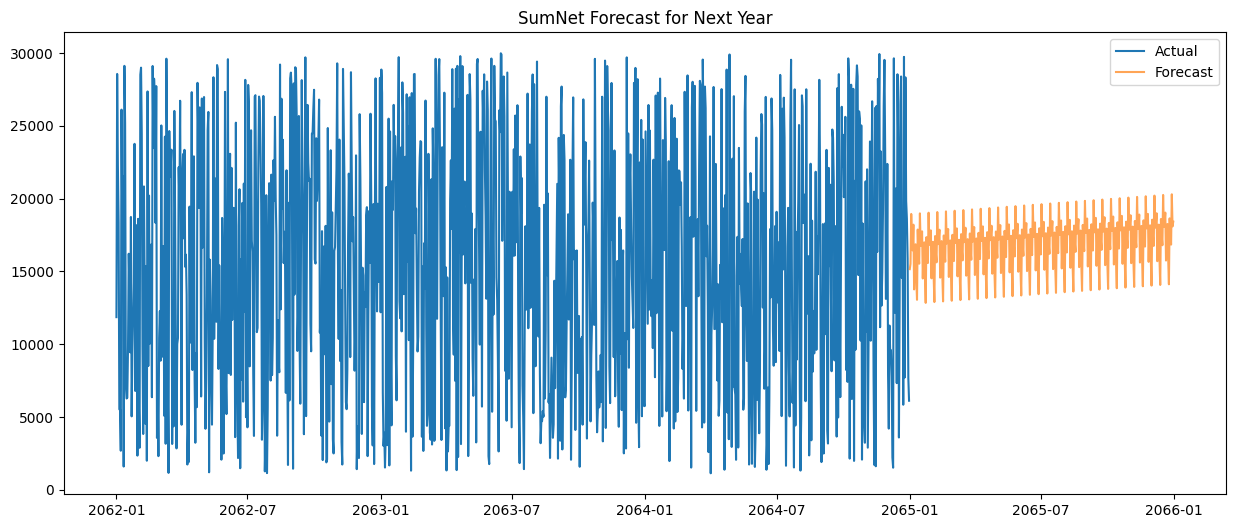

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(daily_data['SumNet'], label='Actual')
plt.plot(forecast, label='Forecast', alpha=0.7)
plt.title('SumNet Forecast for Next Year')
plt.legend()
plt.show()


In [9]:
print(f"Number of Sugar is {forecast}")

Number of Sugar is 2065-01-01    15160.430074
2065-01-02    15521.909967
2065-01-03    18951.614361
2065-01-04    17267.013111
2065-01-05    16449.952335
                  ...     
2065-12-27    17485.985603
2065-12-28    16847.694047
2065-12-29    20302.506155
2065-12-30    18097.964118
2065-12-31    18421.262539
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [10]:
import pandas as pd

# Example: Convert forecast results into a DataFrame
# This part needs to be adjusted based on the actual forecast data structure
forecast_df = pd.DataFrame({
    'Date': pd.date_range(start="2022-01-01", periods=len(forecast), freq='D'),
    'Forecasted SumNet': forecast  # Assuming 'forecast' is a variable containing forecasted values
})

# Specify the filename for the Excel file
filename = '../res/forecast_result_sugar.xlsx'

# Save the DataFrame to an Excel file
forecast_df.to_excel(filename, index=False, engine='openpyxl')

print(f"Forecast result saved to {filename}")


Forecast result saved to ../res/forecast_result_sugar.xlsx


In [11]:
# Calculate the total of the forecasted 'SumNet' values
total_sumnet = forecast_df['Forecasted SumNet'].sum()

# Display the total in the desired format
print(f"Total sumnet is {total_sumnet}")


Total sumnet is 6170885.51049275


In [12]:
import pickle

# Assuming model_fit is your trained SARIMAX model
with open('Transport_sugar_model.pkl', 'wb') as pkl_file:
    pickle.dump(model_fit, pkl_file)

print("Model saved successfully.")


Model saved successfully.


: 